# Heat Capacity of Cementite ($Fe_3C$)

Bengt Hallstedt, Dejan Djurovic, Jörg von Appen, Richard Dronskowski, Alexey Dick, Fritz Körmann, Tilmann Hickel, Jörg Neugebauer, Thermodynamic properties of cementite, Calphad, Volume 34, Issue 1, March 2010, Pages 129-133, ISSN 0364-5916, http://dx.doi.org/10.1016/j.calphad.2010.01.004. (http://www.sciencedirect.com/science/article/pii/S0364591610000052)

The TDB file used here differs slightly from the published TDB to ensure compatibility with pycalphad's TDB parser. All phases except cementite are omitted. The numerical results should be the same.

In [1]:
TDB = """
 ELEMENT C    GRAPHITE                   12.011     1054.0      5.7423 ! 
 ELEMENT FE   BCC_A2                     55.847     4489.0     27.2797 ! 
 TYPE_DEFINITION % SEQ * !
 TYPE_DEFINITION A GES AMEND_PHASE_DESCRIPTION @ MAGNETIC -3 0.28 !
 PHASE CEMENTITE_D011 %A 2 3 1 !
 CONSTITUENT CEMENTITE_D011 : FE : C : !
 PARAMETER  G(CEMENTITE_D011,FE:C;0) 0.01 +GFECEM; 6000 N !
 PARAMETER  TC(CEMENTITE_D011,FE:C;0) 0.01 485.00; 6000 N !
 PARAMETER  BMAGN(CEMENTITE_D011,FE:C;0) 0.01 1.008; 6000 N !
 FUNCTION GFECEM      0.01  +11369.937746-5.641259263*T-8.333E-6*T**4;
        43.00  Y  +11622.647246-59.537709263*T+15.74232*T*LN(T)
       -0.27565*T**2;
       163.00  Y  -10195.860754+690.949887637*T-118.47637*T*LN(T)
                  -0.0007*T**2+590527*T**(-1);
      6000.00  N !
"""

Do some initial setup, including setting up the workspace.

In [2]:
# Only needed in a Jupyter Notebook
%matplotlib inline
# Optional plot styling
import matplotlib
matplotlib.style.use('fivethirtyeight')

We compute the molar heat capacity at all temperatures from 1K to 2000K with a step size of 0.1K.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Workspace, as_property, variables as v

wks = Workspace(TDB, ['FE', 'C'], 'CEMENTITE_D011',
                {v.N: 1, v.P: 1e5, v.T: (1, 2000, 0.1), v.X('C'): 0.25})

The isobaric molar heat capacity is defined as the derivative of the total molar enthalpy (`HM`) with respect to temperature (`T`). We use "Jansson derivative" syntax to specify this as a property. In addition, we give this property a legible name and specify our desired physical units.

Text(0, 0.5, 'Isobaric Heat Capacity [J/mol/K]')

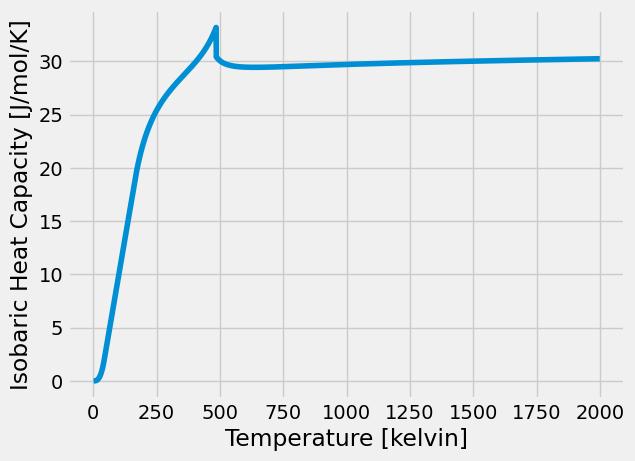

In [5]:
heat_capacity = as_property('HM.T')
heat_capacity.display_name = 'Isobaric Heat Capacity'
heat_capacity.display_units = 'J/mol/K'
plt.plot(wks.get(v.T), wks.get(heat_capacity))
plt.xlabel(f'{v.T.display_name} [{v.T.display_units}]')
plt.ylabel(f'{heat_capacity.display_name} [{heat_capacity.display_units}]')